# IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# DATA LOADING 

In [2]:
df=pd.read_csv("Salary Data.csv", sep='\t')

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
gender_choices = df["Gender"].unique().tolist()
education_choices = df["Education Level"].unique().tolist()
job_choices = df["Job Title"].unique().tolist()


In [5]:
df.shape

(375, 6)

In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

# DATA CLEANING

In [7]:
numerical_val = ['Age', 'Years of Experience', 'Salary']
for col in numerical_val:
    df[col] = df[col].fillna(df[col].mean())

In [8]:
categories_val = ['Gender', 'Education Level', 'Job Title']
for col in categories_val:
    df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 50


In [11]:
df[df.duplicated()]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.000000,Male,Bachelor's,Junior Business Analyst,2.000000,40000.000000
250,30.000000,Female,Bachelor's,Junior Marketing Coordinator,2.000000,40000.000000
251,38.000000,Male,Master's,Senior IT Consultant,9.000000,110000.000000
252,45.000000,Female,PhD,Senior Product Designer,15.000000,150000.000000
253,28.000000,Male,Bachelor's,Junior Business Development Associate,2.000000,40000.000000
254,35.000000,Female,Bachelor's,Senior Marketing Analyst,8.000000,85000.000000
255,44.000000,Male,Bachelor's,Senior Software Engineer,14.000000,130000.000000
256,34.000000,Female,Master's,Senior Financial Advisor,6.000000,100000.000000
257,35.000000,Male,Bachelor's,Senior Project Coordinator,9.000000,95000.000000
258,50.000000,Female,PhD,Director of Operations,22.000000,180000.000000


In [12]:
df = df.drop_duplicates()


In [13]:
df.shape

(325, 6)

# EDA (Exploratory Data Analysis) 

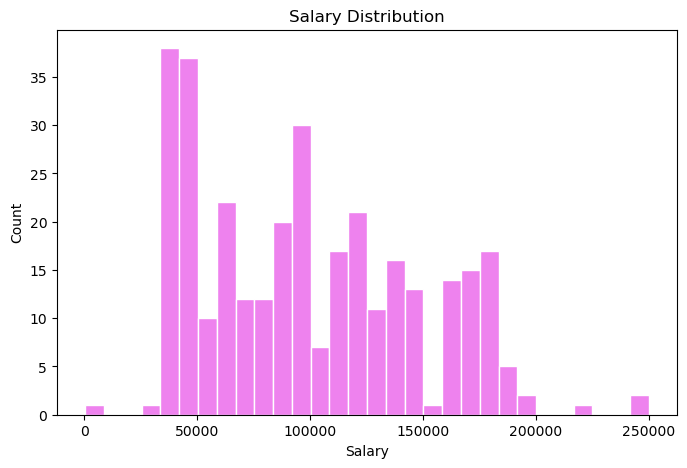

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['Salary'], bins=30, color='violet', edgecolor='white')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

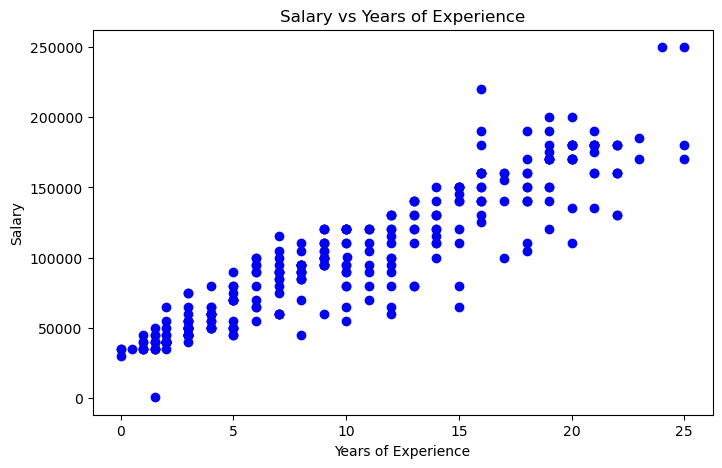

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df['Years of Experience'], df['Salary'], color='blue')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

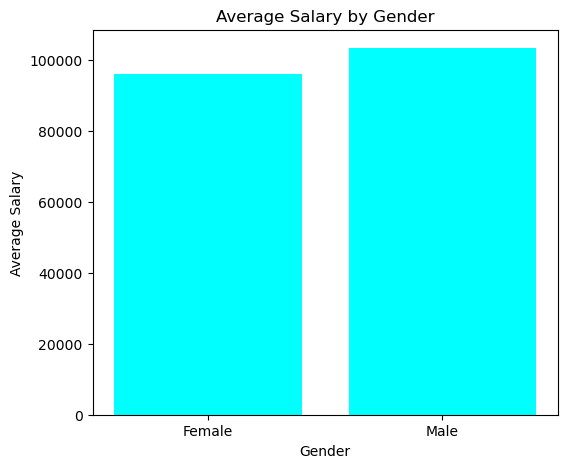

In [16]:
gender_salary = df.groupby('Gender')['Salary'].mean()
plt.figure(figsize=(6,5))
plt.bar(gender_salary.index, gender_salary.values, color='cyan')
plt.title("Average Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.show()

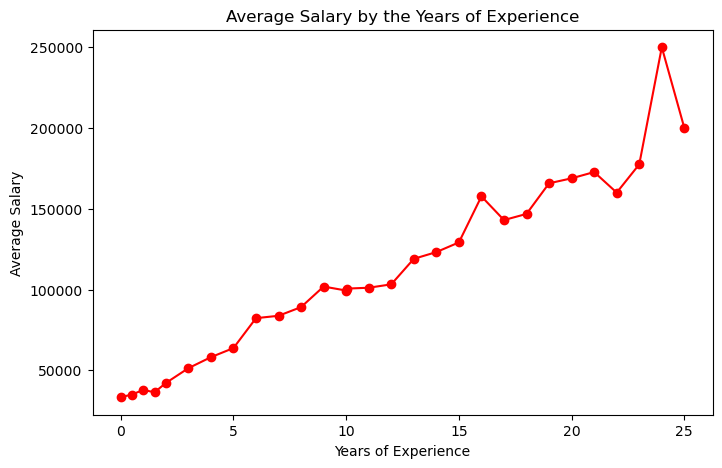

In [17]:
exp_salary = df.groupby('Years of Experience')['Salary'].mean()
plt.figure(figsize=(8,5))
plt.plot(exp_salary.index, exp_salary.values, marker='o', linestyle='-', color='red')
plt.title("Average Salary by the Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.show()

# ONEHOT_ENCODER & ORDINAL_ENCODER

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
X = df.drop("Salary", axis = 1)
y = df["Salary"]

categorical_data = ["Gender", "Education Level", "Job Title"]

In [21]:
encoder = OrdinalEncoder()

In [22]:
X_encoder = X.copy()
X_encoder[categorical_data] = encoder.fit_transform(X[categorical_data])

In [23]:
X_encoder

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1.0,0.0,159.0,5.0
1,28.0,0.0,1.0,17.0,3.0
2,45.0,1.0,2.0,130.0,15.0
3,36.0,0.0,0.0,101.0,7.0
4,52.0,1.0,1.0,22.0,20.0
...,...,...,...,...,...
348,28.0,0.0,0.0,68.0,1.0
349,36.0,1.0,0.0,111.0,8.0
350,44.0,0.0,2.0,115.0,16.0
351,31.0,1.0,0.0,63.0,3.0


In [24]:
X_encoder.shape

(325, 5)

# SPILLITING THE DATA 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoder,y, test_size = 0.2, random_state = 42)

# IMPORT RANDOM_FOREST 

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf_model = RandomForestRegressor()

In [29]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
rf_model_pre = rf_model.predict(X_test)

In [31]:
rf_model_pre

array([ 53600.        , 130950.        , 172800.        , 118500.        ,
       156550.        , 173450.        ,  51550.        , 107900.        ,
        91600.        ,  99150.        , 100650.        , 140500.        ,
       114000.        , 127150.        ,  37750.        ,  38259.75      ,
       152350.        ,  47200.        ,  54550.        ,  39410.5       ,
        46050.        , 174850.        ,  58600.        , 137050.        ,
        59117.32037534, 172600.        ,  39800.        ,  47650.        ,
       162200.        ,  96250.        , 158700.        ,  40650.        ,
       174750.        ,  50050.        , 142800.        ,  91100.        ,
        84850.        ,  69423.09383378,  90450.        , 153950.        ,
        23867.625     ,  48650.        , 109250.        , 123150.        ,
        40950.        ,  48350.        ,  39950.        ,  40000.        ,
       153250.        ,  85640.        , 100450.        ,  97161.54691689,
        54950.        , 1

# EVALUATING THE MSE(rf_model)

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
rf_model_MSE = mean_absolute_error(rf_model_pre, y_test)

In [34]:
rf_model_MSE

8059.372074998282

# IMPORT GRADING_BOOSTING 

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gb_model = GradientBoostingRegressor()

In [37]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
gb_model_pre = gb_model.predict(X_test)

In [39]:
gb_model_pre

array([ 55912.43142035, 126268.128552  , 176461.29595602, 117974.18091065,
       170052.31757469, 184064.70312518,  52194.95197886, 104998.99407453,
        85244.16324715,  95949.57306187, 106033.88592093, 140223.67541384,
       114918.68554034, 135626.86426632,  36147.08720089,  38911.7046509 ,
       155866.95682324,  50929.5282043 ,  64000.12836919,  40292.00786607,
        52005.45955321, 165073.61042262,  61964.45393162, 137545.34801872,
        67644.3179106 , 177194.67506511,  36147.08720089,  46332.91320664,
       163038.66575281,  99513.33155725, 158191.06874806,  40699.12056679,
       184064.70312518,  51548.98100732, 140573.54534999,  95559.72272785,
        86521.88939532,  70107.46241489,  92016.33310851, 155076.75720969,
        31193.78828312,  45925.80050593, 115588.03276869, 123986.43534312,
        43156.45750996,  50077.31351193,  38163.16939033,  40699.12056679,
       153621.90808826,  77215.60317173,  98903.79941758, 120387.52818547,
        59017.65902909, 1

# EVALUATING THE MSE(gb_model) 

In [40]:
gb_model_MSE = mean_absolute_error(gb_model_pre, y_test)

In [41]:
gb_model_MSE

8318.421879605525

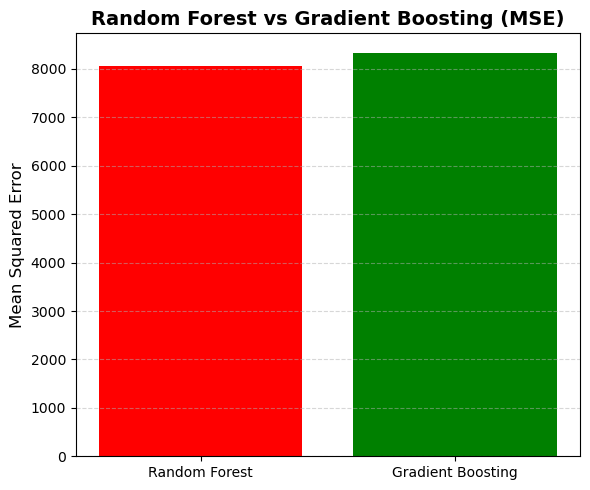

In [42]:
models = ["Random Forest", "Gradient Boosting"]
mse_values = [rf_model_MSE, gb_model_MSE]

plt.figure(figsize=(6,5))
plt.bar(models, mse_values, color=['red', 'green'])
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Random Forest vs Gradient Boosting (MSE)", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
pip install gradio


Note: you may need to restart the kernel to use updated packages.


# UI BY GRADIO LIBRARY

In [44]:
import gradio as gr

def predict_salary(age, gender, education, job, experience):
    if age < 16:
        return " Age must be 16 or above."
    
    input_df = pd.DataFrame([{
        "Age": age,
        "Gender": gender,
        "Education Level": education,
        "Job Title": job,
        "Years of Experience": experience
    }])
    
    input_df[categorical_data] = encoder.transform(input_df[categorical_data])
    
    prediction = rf_model.predict(input_df)[0]
    return f"  Predicted Salary: Rs-{int(prediction):,.2f}"

salary_pre = gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Number(label="Age (must be ≥16)"),
        gr.Dropdown(choices=gender_choices, label="Gender"),
        gr.Dropdown(choices=education_choices, label="Education Level"),
        gr.Dropdown(choices=job_choices, label="Job Title"),
        gr.Number(label="Years of Experience")
    ],
    outputs="text",
    title="Salary Prediction App",
    description="Enter candidate details to predict their salary"
)

salary_pre.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://60562b1276b4f7acae.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [45]:
pip install huggingface_hub


Note: you may need to restart the kernel to use updated packages.
